# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg 
from sklearn import metrics

# Reading and Understanding the Data

In [2]:
data_train=pd.read_excel("book_price/Data_Train.xlsx")

In [3]:
data_train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [4]:
data_train.describe()

,Price
count,6237.000000
mean,560.707516
std,690.110657
min,25.000000
25%,249.180000
50%,373.000000
75%,599.000000
max,14100.000000


In [5]:
data_train.shape

(6237, 9)

In [6]:
data_test=pd.read_excel("book_price/Data_Test.xlsx")

In [7]:
data_test.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


In [8]:
data_test.shape

(1560, 8)

# Data Cleaning

In [9]:
## Checking null values in the dataset

data_train.isnull().sum()*100/data_train.shape[0]

Title           0.0
Author          0.0
Edition         0.0
Reviews         0.0
Ratings         0.0
Synopsis        0.0
Genre           0.0
BookCategory    0.0
Price           0.0
dtype: float64

In [10]:
price=data_train.Price

In [11]:
data_train.drop('Price',axis=1,inplace=True)

In [12]:
new_data=data_train.append(data_test)

In [13]:
new_data.shape

(7797, 8)

In [14]:
new_data["Edition_new"]=new_data.Edition.apply(lambda x: (x.split(",")[0]))

In [15]:
new_data.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Edition_new
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,Paperback
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",Paperback
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,Paperback
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",Paperback
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",Hardcover


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_data.Author=le.fit_transform(new_data.Author)
new_data.Genre=le.fit_transform(new_data.Genre)
new_data.BookCategory=le.fit_transform(new_data.BookCategory)
new_data.Edition_new=le.fit_transform(new_data.Edition_new)

In [17]:
new_data.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Edition_new
0,The Prisoner's Gold (The Hunters 3),748,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,1,0,13
1,Guru Dutt: A Tragedy in Three Acts,370,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,78,2,13
2,Leviathan (Penguin Classics),4045,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",202,6,13
3,A Pocket Full of Rye (Miss Marple),79,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,96,5,13
4,LIFE 70 Years of Extraordinary Photography,1138,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",264,1,8


In [18]:
new_data.columns

Index(['Title', 'Author', 'Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre',
       'BookCategory', 'Edition_new'],
      dtype='object')

In [19]:
new_data.drop('Synopsis',axis=1,inplace=True)

In [20]:
new_data.drop('Title',axis=1,inplace=True)

In [21]:
new_data.drop('Edition',axis=1,inplace=True)

In [22]:
new_data["Reviews"]=new_data.Reviews.apply(lambda x: float(x.split()[0]))

In [23]:
new_data["Ratings"]=new_data.Ratings.str.extract('(\d+)')
new_data["Ratings"]=new_data.Ratings.astype(float)

In [24]:
new_data.head()

,Author,Reviews,Ratings,Genre,BookCategory,Edition_new
0,748,4.0,8.0,1,0,13
1,370,3.9,14.0,78,2,13
2,4045,4.8,6.0,202,6,13
3,79,4.1,13.0,96,5,13
4,1138,5.0,1.0,264,1,8


In [25]:
training=new_data.iloc[:6237]

In [26]:
training['Price']=price

<ipython-input-26-f627ca66c634>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training['Price']=price


In [27]:
training.head()

,Author,Reviews,Ratings,Genre,BookCategory,Edition_new,Price
0,748,4.0,8.0,1,0,13,220.00
1,370,3.9,14.0,78,2,13,202.93
2,4045,4.8,6.0,202,6,13,299.00
3,79,4.1,13.0,96,5,13,180.00
4,1138,5.0,1.0,264,1,8,965.62


In [28]:
## Outlier Treatment

Q1 = training.Price.quantile(0.25)
Q3 = training.Price.quantile(0.75)
IQR = Q3 - Q1
training = training[(training.Price <= Q3 + 1.5*IQR)]

In [29]:
testing=new_data.iloc[6237:]

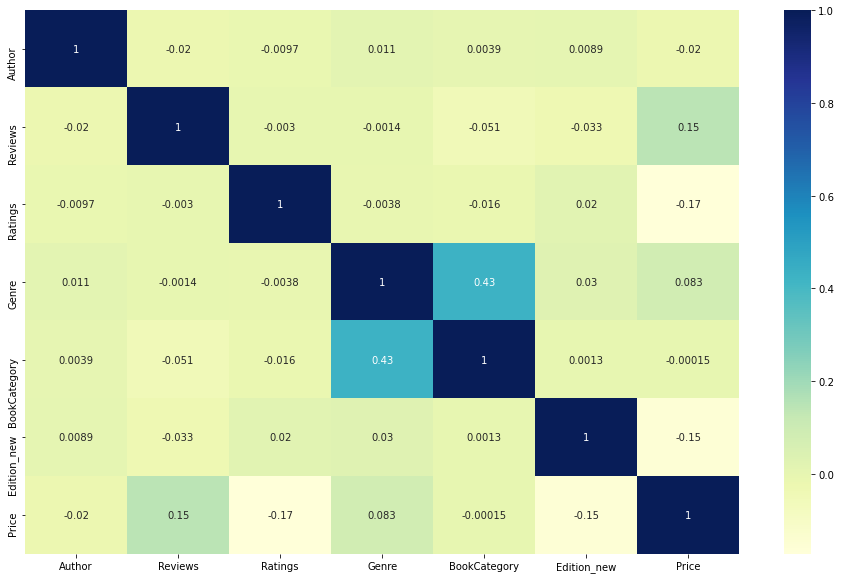

In [30]:
plt.figure(figsize=(16,10))
sns.heatmap(training.corr(),annot=True ,cmap="YlGnBu")
plt.show()

## Splitting the Data into Training and Testing Sets

In [31]:
from sklearn.model_selection import train_test_split


# Dividing into X and Y sets for the model building

In [32]:
X=training.drop('Price',axis=1)
y=training[['Price']]


In [33]:
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=.75,random_state=101)

## Model Building

In [34]:
lm=LinearRegression()
lm.fit(x_train,y_train)

knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

xgb=xg.XGBRegressor()
xgb.fit(x_train,y_train)

rf=RandomForestRegressor()
rf.fit(x_train,y_train)


<ipython-input-34-fb8e74be4d92>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


RandomForestRegressor()

In [35]:
prediction_lm=lm.predict(x_test)
prediction_knn=knn.predict(x_test)
prediction_dtr=dtr.predict(x_test)
prediction_xgb=xgb.predict(x_test)
prediction_rf=rf.predict(x_test)


## Model Evaluation

In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
from sklearn.metrics import mean_squared_log_error

In [38]:
from sklearn.metrics import r2_score
print(mean_squared_error(y_test,prediction_lm))
print(mean_squared_error(y_test,prediction_knn))
print(mean_squared_error(y_test,prediction_dtr))
print(mean_squared_error(y_test,prediction_xgb))
print(mean_squared_error(y_test,prediction_rf))

48058.93891059241
49036.52907556596
73438.0868144602
39653.068196763634
42905.643112735896


In [39]:
print('RMSE_Linear Regression:', np.sqrt(mean_squared_log_error(y_test,abs(prediction_lm))))
print('RMSE_KNeighbors Regressor:', np.sqrt(mean_squared_log_error(y_test,abs(prediction_knn))))
print('RMSE_Decision Tree:', np.sqrt(metrics.mean_squared_log_error(y_test,abs(prediction_dtr))))
print('RMSE_Random Forest:', np.sqrt(metrics.mean_squared_log_error(y_test,abs(prediction_rf))))
print('RMSE_Xgb:', np.sqrt(metrics.mean_squared_log_error(y_test,abs(prediction_xgb))))

RMSE_Linear Regression: 0.6124940390501254
RMSE_KNeighbors Regressor: 0.585631624224654
RMSE_Decision Tree: 0.6907423776186917
RMSE_Random Forest: 0.5499022538292778
RMSE_Xgb: 0.5240629948349532


## Prediction on Test Data

In [40]:
prediction_test=xgb.predict(testing)

In [41]:
prediction_test

array([249.82137, 805.93146, 399.83286, ..., 483.14145, 407.00204,
       489.53943], dtype=float32)

In [42]:
results=pd.DataFrame(data=prediction_test,columns=["Price"])

In [43]:
results

,Price
0,249.821365
1,805.931458
2,399.832855
3,600.696594
4,429.273254
...,...
1555,829.522461
1556,187.518295
1557,483.141449
1558,407.002045


In [44]:
results.to_csv("Book_Price.csv",index=False)